# 0. Data load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Dacon_income_prediction/data/

/content/drive/MyDrive/Dacon_income_prediction/data


In [ ]:
ls

0401_1.csv  0401_3.csv  0401_5.csv  0404_2.csv  sample_submission.csv  train.csv
0401_2.csv  0401_4.csv  0404_1.csv  0404_3.csv  test.csv


In [ ]:
import random
random.seed(42)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown


- 변수

 - ID : 고객의 지정 넘버로 별다른 정보가 없기 때문에 분석에 사용하지 않을 것임
 - Age : 고객의 나이, 연속형 변수
 - Gender : 성별, 이산형 변수
 - Education_Status : 최종학력을 의미한다. 이산형 변수
 - Employment_Status : 취업 상태를 의미한다. 이산형 변수
 - Working_Week (Yearly) : 주당 일하는 시간으로 해석된다. 연속형변수 or 범주를 잡아 이산형으로 파악 가능
 - Industry_Status : 산업분야, 이산형 변수
 - Occupation_Status : 직업 분야, 이산형 변수
 - Race : 인종, 이산형변수
 - Hispanic_Origin : 히스패닉 출신, 이산형 변수
 - Martial_Status : 결혼 여부, 이산형 변수
 - Household_Status : 가족 구성, 이산형 변수
 - Household_Summary : 가족 구성 요약, 이산형 변수
 - Citizenship : 시민권, 이산형 변수
 - Birth_Country : 국적, 이산형변수
 - Birth_Country (Father) : 아버지의 국적, 이산형변수
 - Birth_Country (Mother) : 어머니의 국적, 이산형변수
 - Tax_Status : 세금 여부, 이산형변수
 - Gains : 이득또는 매출로 보인다, 연속형 변수
 - Losses : 지출로 보인다, 연속형 변수
 - Dividends : 배당금, 연속형 변수
 - Income_Status : 소득 상태, 이산형변수
 - income : 소득, 연속형 변수


# 1. 결측값 처리
- train data에는 결측값 없음
- test data에는 Household_Status열에 결측값 1개 존재
 - 가족 구성원을 나타내는 str -> 추후 처리

In [ ]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

In [ ]:
df_test.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [ ]:
df['Household_Status'].unique()

array(['Householder', 'Nonfamily householder',
       'Child 18+ never marr Not in a subfamily', 'Spouse of householder',
       'Other Relative 18+ ever married Responsible Person of subfamily',
       'Child <18 never marr not in subfamily',
       'Other Relative <18 never married child of subfamily Responsible Person',
       'Child 18+ ever married Responsible Person of subfamily',
       'Secondary individual',
       'Grandchild 18+ never marr not in subfamily',
       'Other Rel 18+ ever marr not in subfamily',
       'Responsible Person of unrelated subfamily',
       'Grandchild <18 never married child of subfamily Responsible Person',
       'Child 18+ ever marr Not in a subfamily',
       'Other Rel 18+ never marr not in subfamily',
       'Child 18+ never married Responsible Person of subfamily',
       'Other Rel <18 never marr not in subfamily',
       'Child under 18 of Responsible Person of unrelated subfamily',
       'Grandchild <18 never marr not in subfamily', 'In 

# 2. 이상값 처리
- Gains, Losses열 이상값 처리

2-1) Gains - 상위 1개 데이터 행 삭제

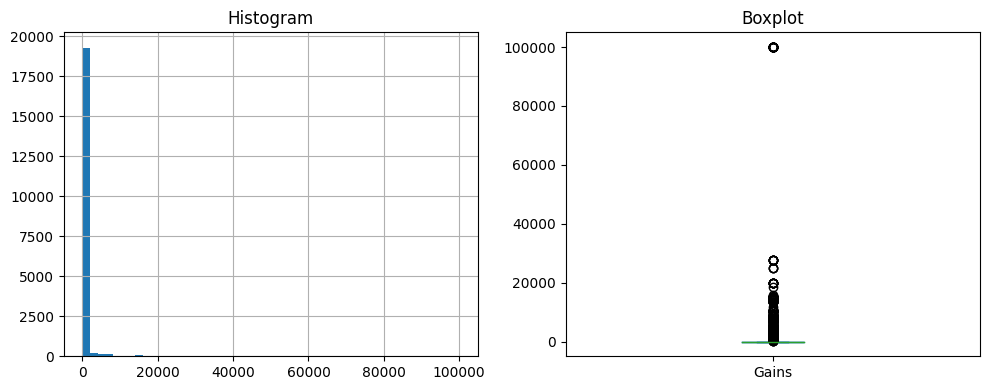

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Gains'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')
df['Gains'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
# 'Gains' 열에서 이상치를 가진 가장 큰 값의 행을 찾기
max_outlier_index = df[df['Gains'] == df['Gains'].max()].index
# 이상치를 가진 행 삭제
df.drop(max_outlier_index, inplace=True)

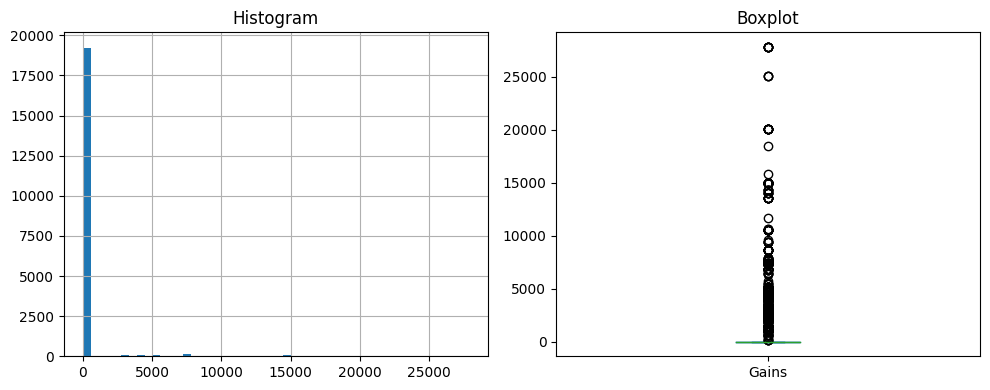

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Gains'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')
df['Gains'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

2-2)Losses열 - 상위 3개 데이터 행 삭제

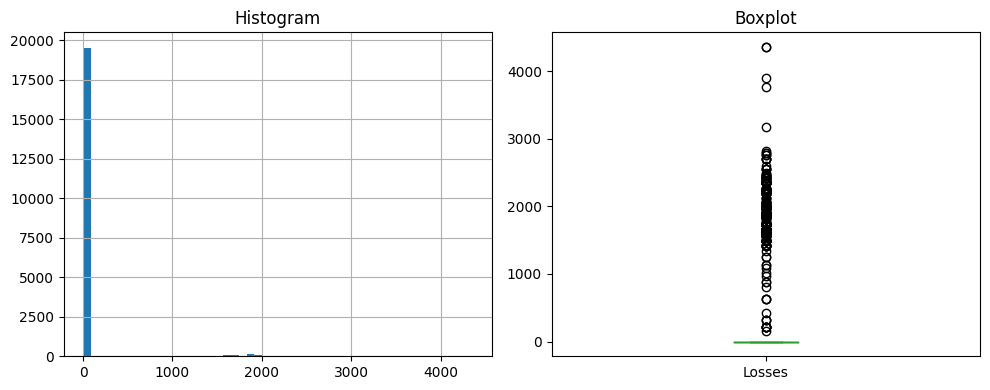

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')
df['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

In [ ]:
# 첫번째 삭제
import pandas as pd
# 'Gains' 열에서 이상치를 가진 가장 큰 값의 행을 찾기
max_outlier_index = df[df['Losses'] == df['Losses'].max()].index
# 이상치를 가진 행 삭제
df.drop(max_outlier_index, inplace=True)

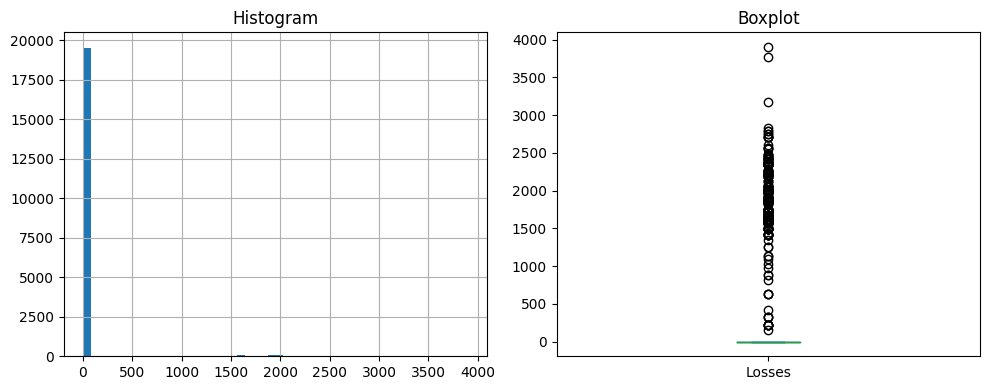

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')
df['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

In [ ]:
# 두번째 삭제
import pandas as pd
# 'Gains' 열에서 이상치를 가진 가장 큰 값의 행을 찾기
max_outlier_index = df[df['Losses'] == df['Losses'].max()].index
# 이상치를 가진 행 삭제
df.drop(max_outlier_index, inplace=True)

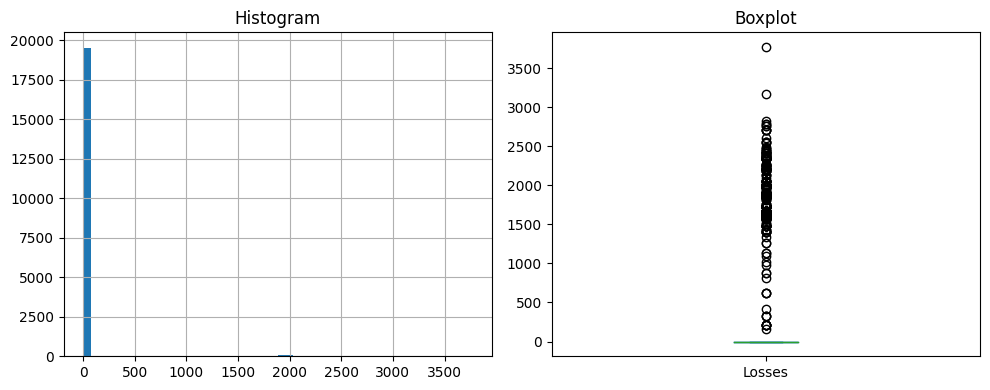

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')
df['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

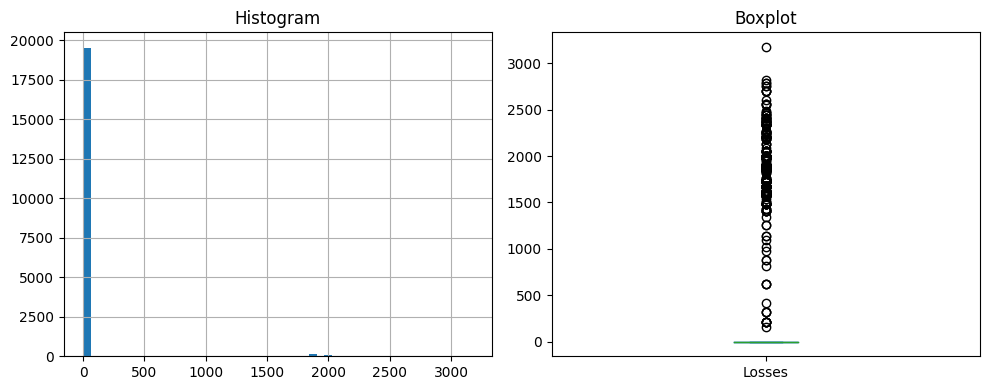

In [ ]:
# 세번째 삭제
import pandas as pd
# 'Gains' 열에서 이상치를 가진 가장 큰 값의 행을 찾기
max_outlier_index = df[df['Losses'] == df['Losses'].max()].index
# 이상치를 가진 행 삭제
df.drop(max_outlier_index, inplace=True)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')
df['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

# 3-0. 데이터 인코딩 전, object 타입 열의 라벨 통일하기

In [ ]:
# 각 열의 데이터 타입 확인
data_types = df.dtypes
data_types

ID                        object
Age                        int64
Gender                    object
Education_Status          object
Employment_Status         object
Working_Week (Yearly)      int64
Industry_Status           object
Occupation_Status         object
Race                      object
Hispanic_Origin           object
Martial_Status            object
Household_Status          object
Household_Summary         object
Citizenship               object
Birth_Country             object
Birth_Country (Father)    object
Birth_Country (Mother)    object
Tax_Status                object
Gains                      int64
Losses                     int64
Dividends                  int64
Income_Status             object
Income                     int64
dtype: object

1. Gender                    
- 별도 처리 불필요

In [ ]:
df['Gender'].value_counts()

Gender
F    10463
M     9503
Name: count, dtype: int64

2. Education_Status          
- 졸업을 기준으로 분리 (초졸, 중졸, 고졸, 대졸, 대학원졸)
- income에 영향을 미칠 것으로 예상되는 전문대졸 / 전문대졸 전공 / 대졸은 분
  - 유졸 : 'Elementary (1-4)','Children', 'Elementary (5-6)', 'Kindergarten' -> Kindergarten
  - 초졸 : 'Middle (7-8)' -> Elementary
  - 중졸 : 'High Freshman','High Sophomore', 'High Junior',  'High Senior' -> Middle
  - 고졸 : 'High graduate' -> High
  - 전문대졸(학문) :'Associates degree (Academic) -> Associates_Academic
  - 전문대졸(기술직) : 'Associates degree (Vocational)' -> Associates_Vocational
  - 대졸: 'Bachelors degree', 'College' -> Univ
  - 대학원졸 : 'Masters degree', -> Master
  - 박사 : 'Doctorate degree','Professional degree', -> Doctor

In [ ]:
df['Education_Status'].unique()

array(['Middle (7-8)', 'Associates degree (Vocational)', 'High graduate',
       'Masters degree', 'Bachelors degree', 'High Freshman',
       'Elementary (1-4)', 'College', 'Children', 'High Sophomore',
       'Associates degree (Academic)', 'High Junior', 'Elementary (5-6)',
       'Doctorate degree', 'Professional degree', 'High Senior',
       'Kindergarten'], dtype=object)

In [ ]:
df['Education_Status'].value_counts()

Education_Status
High graduate                     6492
College                           3787
Children                          2208
Bachelors degree                  1947
High Junior                        820
High Sophomore                     798
Associates degree (Vocational)     741
Associates degree (Academic)       608
High Freshman                      554
Middle (7-8)                       546
Masters degree                     503
Elementary (5-6)                   316
High Senior                        242
Elementary (1-4)                   150
Professional degree                106
Doctorate degree                    84
Kindergarten                        64
Name: count, dtype: int64

In [ ]:
# 라벨 통합
df.loc[df['Education_Status'].isin(['Elementary (1-4)', 'Children', 'Elementary (5-6)']), 'Education_Status'] = 'Kindergarten' # 유졸
df.loc[df['Education_Status'].isin(['Middle (7-8)']), 'Education_Status'] = 'Elementary' # 초졸
df.loc[df['Education_Status'].isin(['High Freshman','High Sophomore','High Junior', 'High Senior']), 'Education_Status'] = 'Middle' # 중졸
df.loc[df['Education_Status'].isin(['High graduate']), 'Education_Status'] = 'High' # 고졸
df.loc[df['Education_Status'].isin(['Associates degree (Academic)']), 'Education_Status'] = 'Associates_Academic' #전문대졸(학문)
df.loc[df['Education_Status'].isin(['Associates degree (Vocational)']), 'Education_Status'] = 'Associates_Vocational' #전문대졸(기술)
df.loc[df['Education_Status'].isin(['Bachelors degree', 'College']), 'Education_Status'] = 'Univ' #대졸
df.loc[df['Education_Status'].isin(['Masters degree']), 'Education_Status'] = 'Master' #석사졸
df.loc[df['Education_Status'].isin(['Doctorate degree', 'Professional degree']), 'Education_Status'] = 'Doctor' # 박사졸
df['Education_Status'].value_counts()

Education_Status
High                     6492
Univ                     5734
Kindergarten             2738
Middle                   2414
Associates_Vocational     741
Associates_Academic       608
Elementary                546
Master                    503
Doctor                    190
Name: count, dtype: int64

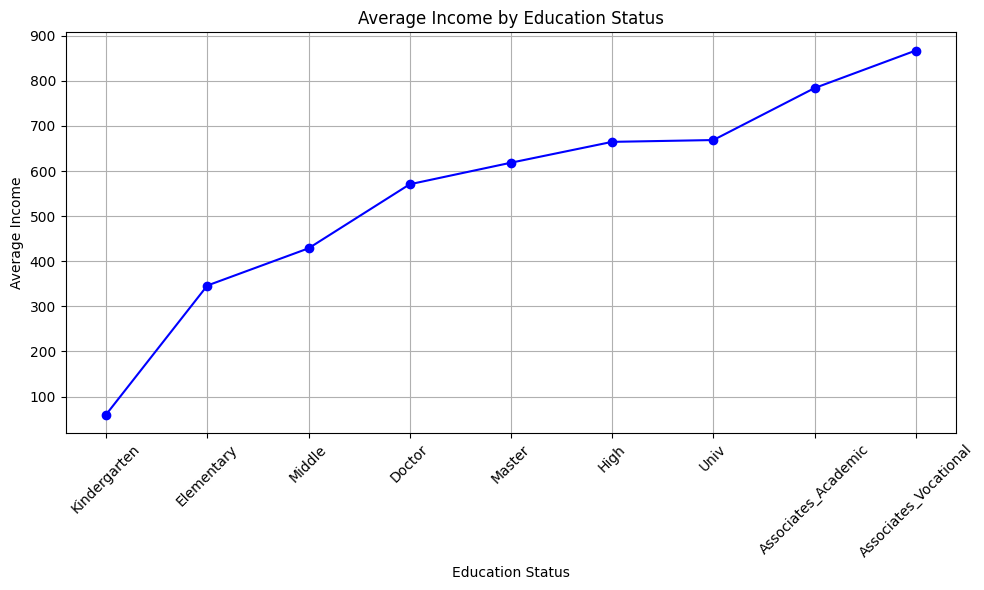

In [ ]:
# 학위 별 income의 평균 시각화
import matplotlib.pyplot as plt

# 각 Education_Status 별 평균 Income 계산
education_income_mean = df.groupby('Education_Status')['Income'].mean().sort_values()

# 시각화
plt.figure(figsize=(10, 6))
education_income_mean.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Average Income by Education Status')
plt.xlabel('Education Status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

3. Employment_Status : 고용상태
- 따로 처리하지 않음  

In [ ]:
df['Employment_Status'].value_counts()

Employment_Status
Children or Armed Forces         11122
Full-Time                         6576
Not Working                       1220
Choice Part-Time                   592
Part-Time (Usually Part-Time)      158
Seeking Full-Time                  121
Part-Time (Usually Full-Time)      100
Seeking Part-Time                   77
Name: count, dtype: int64

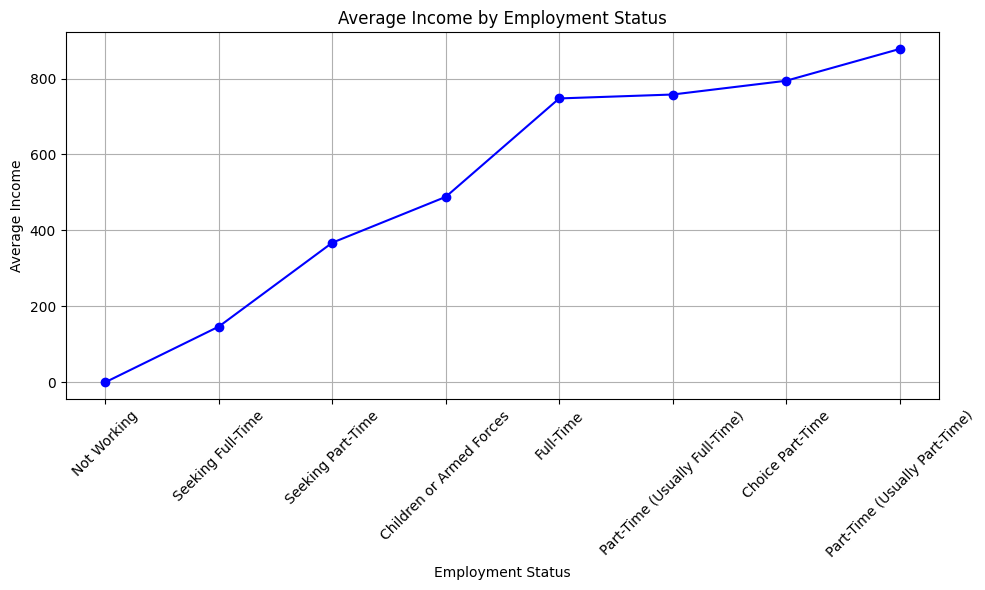

In [ ]:
import matplotlib.pyplot as plt

# 각 Employment_Status 별 평균 Income 계산
employment_income_mean = df.groupby('Employment_Status')['Income'].mean().sort_values()

# 시각화
plt.figure(figsize=(10, 6))
employment_income_mean.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Average Income by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


4. Industry_Status : 산업분야
- Armed Forces 산업군의 데이터가 하나뿐이고, 다른 열의 정보도 0인 경우가 많아 삭제        
- Armed Forces 삭제 외 다른 처리 x
- Not in universe or children에 doctor도 존재. income의 총합이 0이 아닌데 평균은 0으로 나옴 -> 왜?..
- 요소 별 데이터 수 차이가 너무 많이 나는 것이 문제

In [ ]:
df['Industry_Status'].value_counts()

Industry_Status
Not in universe or children                     4684
Retail                                          3147
Manufacturing (Durable)                         1572
Manufacturing (Non-durable)                     1221
Education                                       1040
Business & Repair                                847
Medical (except Hospitals)                       833
Construction                                     832
Hospitals                                        818
Finance Insurance & Real Estate                  722
Transportation                                   691
Public Administration                            640
Other professional services                      477
Wholesale                                        448
Personal Services (except Private Household)     428
Social Services                                  366
Entertainment                                    278
Agriculture                                      268
Utilities & Sanitary          

In [ ]:
armed_forces_rows = df[df['Industry_Status'] == 'Armed Forces']
armed_forces_rows

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
10342,TRAIN_10342,31,F,Univ,Seeking Full-Time,20,Armed Forces,Armed Forces,White,Puerto Rican,...,Native,US,Puerto-Rico,Puerto-Rico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0


In [ ]:
# 'Industry_Status' 값이 'Armed Forces'인 행을 삭제
df = df.drop(df[df['Industry_Status'] == 'Armed Forces'].index)
df['Industry_Status'].value_counts()

Industry_Status
Not in universe or children                     4684
Retail                                          3147
Manufacturing (Durable)                         1572
Manufacturing (Non-durable)                     1221
Education                                       1040
Business & Repair                                847
Medical (except Hospitals)                       833
Construction                                     832
Hospitals                                        818
Finance Insurance & Real Estate                  722
Transportation                                   691
Public Administration                            640
Other professional services                      477
Wholesale                                        448
Personal Services (except Private Household)     428
Social Services                                  366
Entertainment                                    278
Agriculture                                      268
Utilities & Sanitary          

In [ ]:
r = df[df['Industry_Status'] == 'Not in universe or children']
r

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
6,TRAIN_00006,67,M,Elementary,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
7,TRAIN_00007,64,M,Master,Not Working,5,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,2052,Under Median,0
11,TRAIN_00011,75,F,Middle,Children or Armed Forces,0,Not in universe or children,Unknown,White,Cuban,...,Foreign-born (Non-US Citizen),Cuba,Cuba,Cuba,Nonfiler,0,0,0,Unknown,0
16,TRAIN_00016,10,M,Kindergarten,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
21,TRAIN_00021,16,F,Middle,Not Working,14,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,TRAIN_19986,31,M,Elementary,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
19989,TRAIN_19989,14,M,Kindergarten,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
19990,TRAIN_19990,8,M,Kindergarten,Children or Armed Forces,0,Not in universe or children,Unknown,Asian/Pacific,All other,...,Foreign-born (Non-US Citizen),Japan,Japan,Japan,Nonfiler,0,0,0,Unknown,0
19994,TRAIN_19994,17,F,Middle,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0


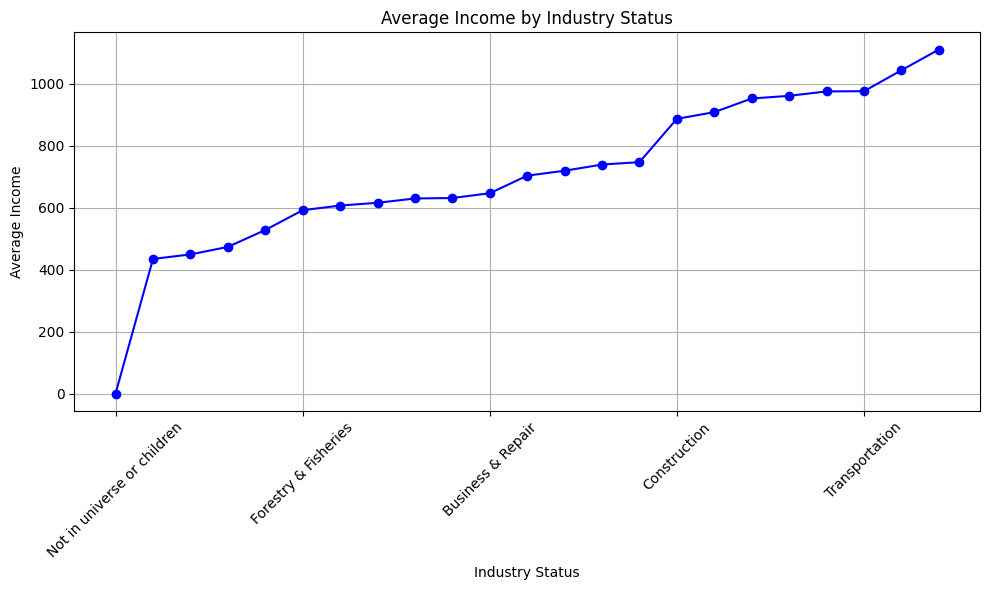

In [ ]:
import matplotlib.pyplot as plt

# 각 Industry_Status 별 평균 Income 계산
industry_income_mean = df.groupby('Industry_Status')['Income'].mean().sort_values()

# 시각화
plt.figure(figsize=(10, 6))
industry_income_mean.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Average Income by Industry Status')
plt.xlabel('Industry Status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# df['Industry_Status']가 'Not in universe or children'인 행의 'Education_Status'열 값의 종류
education_statuses = df[df['Industry_Status'] == 'Not in universe or children']['Education_Status'].unique()
print(education_statuses)

['Elementary' 'Master' 'Middle' 'Kindergarten' 'High' 'Univ'
 'Associates_Vocational' 'Associates_Academic' 'Doctor']


In [ ]:
income_sum = df[df['Industry_Status'] == 'Not in universe or children']['Income'].sum()
print("Industry_Status가 'Not in universe or children'인 행들의 Income의 합:", income_sum)

Industry_Status가 'Not in universe or children'인 행들의 Income의 합: 0


In [ ]:
# df['Education_Status']가 Doctor이면서 df['Income']이 0인 행
doctor_zero_income_rows = df[(df['Education_Status'] == 'Doctor') & (df['Income'] == 0)]
doctor_zero_income_rows

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
91,TRAIN_00091,35,M,Doctor,Full-Time,52,Finance Insurance & Real Estate,Management,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,200,Over Median,0
109,TRAIN_00109,45,M,Doctor,Full-Time,49,Medical (except Hospitals),Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,0
178,TRAIN_00178,33,M,Doctor,Children or Armed Forces,52,Medical (except Hospitals),Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,159,Under Median,0
183,TRAIN_00183,58,M,Doctor,Children or Armed Forces,52,Education,Professional,White,All other,...,Native,US,England,US,Married Filling Jointly both under 65 (MFJ),0,0,9000,Over Median,0
196,TRAIN_00196,72,M,Doctor,Children or Armed Forces,48,Medical (except Hospitals),Professional,White,All other,...,Native,US,Unknown,Unknown,Single,0,1429,4000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19352,TRAIN_19352,62,M,Doctor,Part-Time (Usually Full-Time),52,Public Administration,Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),7688,0,0,Over Median,0
19492,TRAIN_19492,36,F,Doctor,Children or Armed Forces,52,Agriculture,Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0
19544,TRAIN_19544,90,M,Doctor,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Single,0,0,17000,Under Median,0
19561,TRAIN_19561,76,M,Doctor,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,Italy,Unknown,Married Filling Jointly both over 65 (MFJ),0,0,0,Over Median,0


In [ ]:
doctor_nonzero_income_rows = df[(df['Education_Status'] == 'Doctor') & (df['Income'] != 0)]
doctor_nonzero_income_rows

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
161,TRAIN_00161,32,F,Doctor,Choice Part-Time,52,Medical (except Hospitals),Professional,White,All other,...,Native,US,US,Unknown,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,725
943,TRAIN_00943,45,F,Doctor,Full-Time,52,Education,Professional,White,Puerto Rican,...,Native,US,Puerto-Rico,Puerto-Rico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,3400
1012,TRAIN_01012,42,M,Doctor,Full-Time,35,Education,Professional,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,3750
1887,TRAIN_01887,47,M,Doctor,Full-Time,25,Wholesale,Services,White,Other Spanish,...,Foreign-born (Non-US Citizen),Unknown,Unknown,Unknown,Single,0,0,0,Under Median,600
2008,TRAIN_02008,46,M,Doctor,Children or Armed Forces,52,Other professional services,Professional,White,All other,...,Native,US,US,US,Single,0,0,0,Over Median,9999
2446,TRAIN_02446,59,M,Doctor,Children or Armed Forces,52,Finance Insurance & Real Estate,Management,Black,All other,...,Foreign-born (Naturalized US Citizen),Unknown,Unknown,Unknown,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,1400
2504,TRAIN_02504,29,F,Doctor,Full-Time,52,Education,Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,25,Unknown,1350
2663,TRAIN_02663,28,F,Doctor,Children or Armed Forces,14,Hospitals,Professional,Asian/Pacific,All other,...,Foreign-born (Non-US Citizen),China,China,China,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,1365
3648,TRAIN_03648,40,F,Doctor,Children or Armed Forces,49,Public Administration,Admin Support (include Clerical),White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Over Median,3745
4322,TRAIN_04322,27,F,Doctor,Full-Time,35,Agriculture,Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,1500


In [ ]:
#'Education_Status'가 'Doctor'이면서 df['Industry_Status']가 'Not in universe or children'가 아닌 행
doctor_non_universe_or_children_rows = df[(df['Education_Status'] == 'Doctor') & (df['Industry_Status'] != 'Not in universe or children')]
doctor_non_universe_or_children_rows


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
91,TRAIN_00091,35,M,Doctor,Full-Time,52,Finance Insurance & Real Estate,Management,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,200,Over Median,0
109,TRAIN_00109,45,M,Doctor,Full-Time,49,Medical (except Hospitals),Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,0
161,TRAIN_00161,32,F,Doctor,Choice Part-Time,52,Medical (except Hospitals),Professional,White,All other,...,Native,US,US,Unknown,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,725
178,TRAIN_00178,33,M,Doctor,Children or Armed Forces,52,Medical (except Hospitals),Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,159,Under Median,0
183,TRAIN_00183,58,M,Doctor,Children or Armed Forces,52,Education,Professional,White,All other,...,Native,US,England,US,Married Filling Jointly both under 65 (MFJ),0,0,9000,Over Median,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19352,TRAIN_19352,62,M,Doctor,Part-Time (Usually Full-Time),52,Public Administration,Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),7688,0,0,Over Median,0
19397,TRAIN_19397,76,M,Doctor,Children or Armed Forces,50,Other professional services,Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both over 65 (MFJ),9386,0,525,Over Median,2200
19492,TRAIN_19492,36,F,Doctor,Children or Armed Forces,52,Agriculture,Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0
19714,TRAIN_19714,42,F,Doctor,Children or Armed Forces,52,Medical (except Hospitals),Professional,White,All other,...,Native,US,US,US,Single,0,0,100,Unknown,2360


In [ ]:
# 'Education_Status'가 'Doctor'이면서 df['Industry_Status']가 'Not in universe or children'가 이면서 'Income'이 0이 아닌 행
doctor_non_universe_or_children_nonzero_income_rows = df[(df['Education_Status'] == 'Doctor') & (df['Industry_Status'] != 'Not in universe or children') & (df['Income'] != 0)]
doctor_non_universe_or_children_nonzero_income_rows


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
161,TRAIN_00161,32,F,Doctor,Choice Part-Time,52,Medical (except Hospitals),Professional,White,All other,...,Native,US,US,Unknown,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,725
943,TRAIN_00943,45,F,Doctor,Full-Time,52,Education,Professional,White,Puerto Rican,...,Native,US,Puerto-Rico,Puerto-Rico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,3400
1012,TRAIN_01012,42,M,Doctor,Full-Time,35,Education,Professional,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,3750
1887,TRAIN_01887,47,M,Doctor,Full-Time,25,Wholesale,Services,White,Other Spanish,...,Foreign-born (Non-US Citizen),Unknown,Unknown,Unknown,Single,0,0,0,Under Median,600
2008,TRAIN_02008,46,M,Doctor,Children or Armed Forces,52,Other professional services,Professional,White,All other,...,Native,US,US,US,Single,0,0,0,Over Median,9999
2446,TRAIN_02446,59,M,Doctor,Children or Armed Forces,52,Finance Insurance & Real Estate,Management,Black,All other,...,Foreign-born (Naturalized US Citizen),Unknown,Unknown,Unknown,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,1400
2504,TRAIN_02504,29,F,Doctor,Full-Time,52,Education,Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,25,Unknown,1350
2663,TRAIN_02663,28,F,Doctor,Children or Armed Forces,14,Hospitals,Professional,Asian/Pacific,All other,...,Foreign-born (Non-US Citizen),China,China,China,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,1365
3648,TRAIN_03648,40,F,Doctor,Children or Armed Forces,49,Public Administration,Admin Support (include Clerical),White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Over Median,3745
4322,TRAIN_04322,27,F,Doctor,Full-Time,35,Agriculture,Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,1500


5. Occupation_Status : 직업 분야
- Occupation_Status가 Unknown인 열 = Industry_Status가 Not in universe or children인 열
- 별도 처리 안함



In [ ]:
# Occupation_Status가 'Unknown'이고 Industry_Status가 'Retail'인 행의 개수
count = df[(df['Occupation_Status'] == 'Unknown') & (df['Industry_Status'] == 'Not in universe or children')].shape[0]
print("행의 개수:", count)

행의 개수: 4684


In [ ]:
count = df[ (df['Industry_Status'] == 'Not in universe or children')].shape[0]
print("행의 개수:", count)

행의 개수: 4684


In [ ]:
df['Occupation_Status']

0                                Services
1                                Services
2        Admin Support (include Clerical)
3                   Technicians & Support
4                                   Sales
                       ...               
19995                   Handlers/Cleaners
19996    Admin Support (include Clerical)
19997               Technicians & Support
19998                             Unknown
19999    Admin Support (include Clerical)
Name: Occupation_Status, Length: 19965, dtype: object

In [ ]:
df['Occupation_Status'].value_counts()

Occupation_Status
Unknown                             4684
Admin Support (include Clerical)    2706
Services                            2311
Craft & Repair                      1867
Sales                               1688
Professional                        1478
Machine Operators & Inspectors      1381
Management                          1107
Handlers/Cleaners                    836
Transportation                       689
Technicians & Support                558
Farming & Forestry & Fishing         296
Protective Services                  259
Private Household Services           105
Name: count, dtype: int64

6. Race : 인종    
- 별도 처리 안함
- 레이블 간 데이터 수 차이의 문제                

In [ ]:
df['Race'].value_counts()

Race
White                           16813
Black                            2121
Asian/Pacific                     509
Other                             296
Native American/Aleut/Eskimo      226
Name: count, dtype: int64

7. Hispanic_Origin: 히스패닉 출신
- 별도 처리 안함
- 데이터 수 불균형의 문제 있음      

In [ ]:
df['Hispanic_Origin'].value_counts()

Hispanic_Origin
 All other                    17740
 Mexican-American               653
 Mexican (Mexicano)             623
 Central or South American      322
 Puerto Rican                   242
 Other Spanish                  201
 Cuban                           76
 NA                              59
 Chicano                         27
 Do not know                     22
Name: count, dtype: int64

8. Martial_Status            
-  별도 처리 안함
- 데이터 수 불균형의 문제 있음  

In [ ]:
df['Martial_Status'].value_counts()

Martial_Status
Married                         9530
Single                          7375
Divorced                        1630
Widowed                          754
Separated                        435
Married (Spouse Absent)          171
Married (Armed Force Spouse)      70
Name: count, dtype: int64

9. Household_Status : 가족 구성
- 주택주
 - Householder
- 주택주의 배우자
 - Spouse of householder
- 비가족 주택주
 - Nonfamily householder
- 주택주와 가족이 아닌 구성원(룸메이트 등) -> individual
 - Secondary individual
 - Responsible Person of unrelated subfamily
 - In group quarters
- 18세 이상 미혼, 가족 없음->o18nmyf (over 18, no marry, yes family)
 - Child 18+ never marr Not in a subfamily
 - Other Rel 18+ never marr not in subfamily
 - Grandchild 18+ never marr not in subfamily
- 18세 이상 기혼, 가족 없음-> o18ymnf
 - Other Rel 18+ ever marr not in subfamily
 - Child 18+ ever marr Not in a subfamily
 - Grandchild 18+ ever marr not in subfamily
- 18세 이상 기혼, 부양 있음-> o18ymyf
 - Child 18+ ever married Responsible Person of subfamily
 - Other Relative 18+ ever married Responsible Person of subfamily
 - Other Relative 18+ spouse of subfamily Responsible Person
 - Spouse of Responsible Person of unrelated subfamily
 - Grandchild 18+ ever married Responsible Person of subfamily
- 18세 이상 미혼, 부양 있음-> o18nmyf
 - Child 18+ never married Responsible Person of subfamily
 - Other Relative 18+ never married Responsible Person of subfamily
 - Child 18+ spouse of subfamily Responsible Person
 - Grandchild 18+ spouse of subfamily Responsible Person
- 18세 미만, 부양 있음 -> u18nmyf
 - Grandchild <18 never married child of subfamily Responsible Person
 - Child under 18 of Responsible Person of unrelated subfamily
 - Other Relative <18 never married child of subfamily Responsible Person
 - Child <18 never married Responsible Person of subfamily
 - Child <18 ever married Responsible Person of subfamily
 - Other Relative <18 ever married Responsible Person of subfamily

- 18세 미만, 부양 없음 -> u18nmnf
 - Grandchild <18 never marr not in subfamily
 - Other Rel <18 never marr not in subfamily
 - Child <18 ever marr not in subfamily


In [ ]:
df['Household_Status'].value_counts()

Household_Status
Householder                                                               6061
Spouse of householder                                                     4793
Child <18 never marr not in subfamily                                     2670
Nonfamily householder                                                     2458
Child 18+ never marr Not in a subfamily                                   1860
Secondary individual                                                       845
Other Rel 18+ never marr not in subfamily                                  195
Other Rel 18+ ever marr not in subfamily                                   154
Child 18+ ever marr Not in a subfamily                                     118
Child 18+ ever married Responsible Person of subfamily                     101
Child 18+ never married Responsible Person of subfamily                     95
Grandchild <18 never married child of subfamily Responsible Person          88
Responsible Person of unrelated sub

In [ ]:
df.loc[df['Household_Status'].isin(['Secondary individual', 'Responsible Person of unrelated subfamily', 'In group quarters']), 'Household_Status'] = 'individual' # 유졸
df.loc[df['Household_Status'].isin(['Child 18+ never marr Not in a subfamily', 'Other Rel 18+ never marr not in subfamily', 'Grandchild 18+ never marr not in subfamily']), 'Household_Status'] = 'o18nmyf' # 유졸
df.loc[df['Household_Status'].isin(['Other Rel 18+ ever marr not in subfamily', 'Child 18+ ever marr Not in a subfamily', 'Grandchild 18+ ever marr not in subfamily']), 'Household_Status'] = 'o18ymnf' # 유졸
df.loc[df['Household_Status'].isin(['Child 18+ ever married Responsible Person of subfamily', 'Other Relative 18+ ever married Responsible Person of subfamily', 'Other Relative 18+ spouse of subfamily Responsible Person', 'Spouse of Responsible Person of unrelated subfamily', 'Grandchild 18+ ever married Responsible Person of subfamily']), 'Household_Status'] = 'o18ymyf' # 유졸
df.loc[df['Household_Status'].isin(['Child 18+ never married Responsible Person of subfamily', 'Other Relative 18+ never married Responsible Person of subfamily', 'Child 18+ spouse of subfamily Responsible Person','Grandchild 18+ spouse of subfamily Responsible Person']), 'Household_Status'] = 'o18nmyf' # 유졸
df.loc[df['Household_Status'].isin(['Grandchild <18 never married child of subfamily Responsible Person', 'Child under 18 of Responsible Person of unrelated subfamily', 'Other Relative <18 never married child of subfamily Responsible Person', 'Child <18 never married Responsible Person of subfamily','Child <18 ever married Responsible Person of subfamily','Other Relative <18 ever married Responsible Person of subfamily']), 'Household_Status'] = 'u18nmyf' # 유졸
df.loc[df['Household_Status'].isin(['Grandchild <18 never marr not in subfamily', 'Other Rel <18 never marr not in subfamily','Child <18 ever marr not in subfamily']), 'Household_Status'] = 'u18nmnf'

In [ ]:
df['Household_Status'].value_counts()

Household_Status
Householder                              6061
Spouse of householder                    4793
Child <18 never marr not in subfamily    2670
Nonfamily householder                    2458
o18nmyf                                  2249
individual                                958
o18ymnf                                   275
o18ymyf                                   255
u18nmyf                                   164
u18nmnf                                    82
Name: count, dtype: int64

10. Household_Summary         
- 별도 처리 안함

In [ ]:
df['Household_Summary'].value_counts()

Household_Summary
Householder                             8519
Spouse of householder                   4793
Child under 18 never married            2679
Child 18 or older                       2191
Nonrelative of householder               974
Other relative of householder            781
Group Quarters- Secondary individual      24
Child under 18 ever married                4
Name: count, dtype: int64

11. Citizenship               
- 별도 처리 안함

In [ ]:
df['Citizenship'].value_counts()

Citizenship
Native                                         17796
Foreign-born (Non-US Citizen)                   1254
Foreign-born (Naturalized US Citizen)            587
Native (Born Abroad)                             197
Native (Born in Puerto Rico or US Outlying)      131
Name: count, dtype: int64

12. Birth_Country             

In [ ]:
df['Birth_Country'].value_counts()

Birth_Country
US                              17796
Mexico                            539
Unknown                           330
Puerto-Rico                       116
Philippines                       112
Germany                            90
Canada                             75
El-Salvador                        68
Cuba                               58
India                              54
Dominican-Republic                 49
England                            47
Poland                             45
Jamaica                            45
Italy                              35
Columbia                           35
Vietnam                            31
Japan                              30
Ecuador                            30
South Korea                        30
Portugal                           29
Guatemala                          28
Nicaragua                          28
China                              28
Haiti                              25
Iran                               2

In [ ]:
# Birth_Country가 Unknown이고 Birth_Country (Father)나 'Birth_Country (Mother)'가 Unknown이 아닌 행
# 61개 -> 부모의 Country로 채우기
count = ((df['Birth_Country'] == 'Unknown') &
         ((df['Birth_Country (Father)'] != 'Unknown') | (df['Birth_Country (Mother)'] != 'Unknown'))).sum()

print("조건을 충족하는 행의 개수:", count)

조건을 충족하는 행의 개수: 61


In [ ]:
# Birth_Country (Mother)만 Unknown이 아닌 경우 Birth_Country (Mother)로 채우기
condition_1 = (df['Birth_Country'] == 'Unknown') & (df['Birth_Country (Father)'] == 'Unknown') & (df['Birth_Country (Mother)'] != 'Unknown')
selected_rows_1 = df[condition_1]
df.loc[condition_1, 'Birth_Country'] = selected_rows_1['Birth_Country (Mother)']

# Birth_Country (Father)만 Unknown이 아닌 경우 Birth_Country (Father)로 채우기
condition_2 = (df['Birth_Country'] == 'Unknown') & (df['Birth_Country (Mother)'] == 'Unknown') & (df['Birth_Country (Father)'] != 'Unknown')
selected_rows_2 = df[condition_2]
df.loc[condition_2, 'Birth_Country'] = selected_rows_2['Birth_Country (Father)']

# Birth_Country (Father)와 Birth_Country (Mother)를 모두 아는 경우, 두 값이 같으면 그 값으로 채우기 -> 30개 행
condition = (df['Birth_Country'] == 'Unknown') & (df['Birth_Country (Father)'] != 'Unknown') & (df['Birth_Country (Mother)'] != 'Unknown')
selected_rows = df[condition]
same_country_condition = selected_rows['Birth_Country (Father)'] == selected_rows['Birth_Country (Mother)']
df.loc[condition & same_country_condition, 'Birth_Country'] = selected_rows.loc[same_country_condition, 'Birth_Country (Father)']

# 두 값을 알고 두 값이 다른 경우 출력 -> 3개 행
condition_3 = (df['Birth_Country'] == 'Unknown') & (df['Birth_Country (Father)'] != 'Unknown') & (df['Birth_Country (Mother)'] != 'Unknown')
result_rows = df[condition_3]
result_rows

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
4557,TRAIN_04557,51,M,High,Full-Time,52,Retail,Handlers/Cleaners,White,Central or South American,...,Foreign-born (Non-US Citizen),Unknown,Portugal,Germany,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,1400
7423,TRAIN_07423,50,M,High,Children or Armed Forces,52,Retail,Transportation,White,Central or South American,...,Foreign-born (Non-US Citizen),Unknown,Portugal,Germany,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,1875
18653,TRAIN_18653,64,M,High,Children or Armed Forces,52,Business & Repair,Services,Black,All other,...,Native (Born Abroad),Unknown,US,Trinadad&Tobago,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,0


In [ ]:
# 3개 행에 대해 수동 처리
# 특정 행의 'Birth_Country' 값을 변경
#df.loc[4557, 'Birth_Country'] = 'Germany'
#df.loc[7423, 'Birth_Country'] = 'Germany'
#df.loc[18653, 'Birth_Country'] = 'US'

In [ ]:
# Birth_Country가 Unknown이고 Birth_Country (Father)나 'Birth_Country (Mother)'가 Unknown이 아닌 행
# 61개 -> 부모의 Country로 채우기
count = ((df['Birth_Country'] == 'Unknown') &
         ((df['Birth_Country (Father)'] != 'Unknown') | (df['Birth_Country (Mother)'] != 'Unknown'))).sum()

print("조건을 충족하는 행의 개수:", count)

조건을 충족하는 행의 개수: 3


In [ ]:
df['Birth_Country'].value_counts()

Birth_Country
US                              17821
Mexico                            539
Unknown                           272
Puerto-Rico                       119
Philippines                       113
Germany                            92
Canada                             75
El-Salvador                        68
Cuba                               58
India                              56
England                            50
Dominican-Republic                 49
Poland                             47
Jamaica                            45
Italy                              39
Columbia                           36
China                              34
Vietnam                            31
Ecuador                            31
Japan                              31
South Korea                        31
Portugal                           30
Guatemala                          28
Nicaragua                          28
Iran                               25
Haiti                              2

13. Birth_Country (Father)

In [ ]:
df['Birth_Country (Father)'].value_counts()

Birth_Country (Father)
US                              16537
Mexico                            844
Unknown                           581
Puerto-Rico                       204
Italy                             197
Canada                            127
Philippines                       121
Poland                            110
Dominican-Republic                 99
Germany                            92
El-Salvador                        83
Cuba                               78
China                              69
England                            69
India                              67
Jamaica                            56
Portugal                           47
Ireland                            46
Columbia                           44
Ecuador                            41
Haiti                              37
Greece                             33
South Korea                        33
Guatemala                          33
Vietnam                            32
Nicaragua                  

In [ ]:
count = ((df['Birth_Country (Father)'] == 'Unknown') &
         ((df['Birth_Country'] != 'Unknown') | (df['Birth_Country (Mother)'] != 'Unknown'))).sum()

print("조건을 충족하는 행의 개수:", count) # 자식이나 아내의 country로 채우기

조건을 충족하는 행의 개수: 312


In [ ]:
# Birth_Country와 Birth_Country (Father)가 Unknown이고 Birth_Country (Mother)열이 Unknown이 아닌 경우, Birth_Country (Father)를 Birth_Country (Mother)값으로 채움
condition_1 = (df['Birth_Country'] == 'Unknown') & (df['Birth_Country (Father)'] == 'Unknown') & (df['Birth_Country (Mother)'] != 'Unknown')
df.loc[condition_1, 'Birth_Country (Father)'] = df.loc[condition_1, 'Birth_Country (Mother)']

# Birth_Country (Mother)와 Birth_Country (Father)가 Unknown이고 Birth_Country 열이 Unknown이 아닌 경우, Birth_Country (Father)를 Birth_Country 값으로 채움
condition_2 = (df['Birth_Country'] != 'Unknown') & (df['Birth_Country (Mother)'] == 'Unknown') & (df['Birth_Country (Father)'] == 'Unknown')
df.loc[condition_2, 'Birth_Country (Father)'] = df.loc[condition_2, 'Birth_Country']

# Birth_Country (Father)가 Unknown이고 Birth_Country와 Birth_Country (Mother)가 Unknown이 아닌 경우, Birth_Country와 Birth_Country (Mother)가 같으면 Birth_Country (Father)를 Birth_Country (Mother)로 채움
condition_3 = (df['Birth_Country'] != 'Unknown') & (df['Birth_Country (Mother)'] != 'Unknown') & (df['Birth_Country (Father)'] == 'Unknown')
same_country_condition = df['Birth_Country'] == df['Birth_Country (Mother)']
df.loc[condition_3 & same_country_condition, 'Birth_Country (Father)'] = df.loc[condition_3 & same_country_condition, 'Birth_Country (Mother)']

# Birth_Country (Father)가 Unknown이고 Birth_Country와 Birth_Country (Mother)가 Unknown이 아닌 경우, Birth_Country와 Birth_Country (Mother)가 다른 행 출력
condition_4 = (df['Birth_Country'] != 'Unknown') & (df['Birth_Country (Mother)'] != 'Unknown') & (df['Birth_Country (Father)'] == 'Unknown') & (df['Birth_Country'] != df['Birth_Country (Mother)'])
result_rows = df[condition_4]

# 결과 출력
print(result_rows.shape) # 35개 행 -> 처리 안함
result_rows.head(3)

(35, 23)


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
1723,TRAIN_01723,20,M,Univ,Children or Armed Forces,40,Transportation,Admin Support (include Clerical),White,All other,...,Native,US,Unknown,Germany,Single,0,0,0,Under Median,700
1785,TRAIN_01785,22,M,Univ,Full-Time,52,Retail,Sales,Asian/Pacific,All other,...,Native,US,Unknown,England,Single,0,0,0,Unknown,500
1847,TRAIN_01847,80,F,Middle,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Foreign-born (Naturalized US Citizen),Canada,Unknown,England,Married Filling Jointly both over 65 (MFJ),0,0,0,Under Median,0


In [ ]:
df['Birth_Country (Father)'].value_counts() # Unknown 581 -> 304

Birth_Country (Father)
US                              16786
Mexico                            845
Unknown                           304
Puerto-Rico                       206
Italy                             199
Canada                            130
Philippines                       121
Poland                            110
Dominican-Republic                 99
Germany                            98
El-Salvador                        83
Cuba                               82
England                            71
China                              70
India                              68
Jamaica                            56
Portugal                           47
Ireland                            46
Columbia                           44
Ecuador                            41
Haiti                              37
Guatemala                          33
South Korea                        33
Greece                             33
Vietnam                            32
Nicaragua                  

14. Birth_Country (Mother)

In [ ]:
df['Birth_Country (Mother)'].value_counts()

Birth_Country (Mother)
US                              16569
Mexico                            848
Unknown                           517
Puerto-Rico                       192
Canada                            158
Italy                             152
Philippines                       128
Germany                           116
Poland                            104
El-Salvador                        99
England                            88
Dominican-Republic                 75
Cuba                               73
India                              66
China                              60
Ireland                            58
Jamaica                            56
Portugal                           44
Columbia                           44
Ecuador                            43
South Korea                        40
Vietnam                            39
Japan                              37
Guatemala                          36
Nicaragua                          35
Haiti                      

In [ ]:
count = ((df['Birth_Country (Mother)'] == 'Unknown') &
         ((df['Birth_Country'] != 'Unknown') | (df['Birth_Country (Father)'] != 'Unknown'))).sum()

print("조건을 충족하는 행의 개수:", count) # 자식이나 남편의 country로 채우기

조건을 충족하는 행의 개수: 248


In [ ]:
condition_1 = (df['Birth_Country'] == 'Unknown') & (df['Birth_Country (Mother)'] == 'Unknown') & (df['Birth_Country (Father)'] != 'Unknown')
df.loc[condition_1, 'Birth_Country (Mother)'] = df.loc[condition_1, 'Birth_Country (Father)']

condition_2 = (df['Birth_Country'] != 'Unknown') & (df['Birth_Country (Mother)'] == 'Unknown') & (df['Birth_Country (Father)'] == 'Unknown')
df.loc[condition_2, 'Birth_Country (Mother)'] = df.loc[condition_2, 'Birth_Country']

condition_3 = (df['Birth_Country'] != 'Unknown') & (df['Birth_Country (Mother)'] == 'Unknown') & (df['Birth_Country (Father)'] != 'Unknown')
same_country_condition = df['Birth_Country'] == df['Birth_Country (Father)']
df.loc[condition_3 & same_country_condition, 'Birth_Country (Mother)'] = df.loc[condition_3 & same_country_condition, 'Birth_Country (Father)']

condition_4 = (df['Birth_Country'] != 'Unknown') & (df['Birth_Country (Mother)'] == 'Unknown') & (df['Birth_Country (Father)'] != 'Unknown') & (df['Birth_Country'] != df['Birth_Country (Father)'])
result_rows = df[condition_4]

In [ ]:
result_rows

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
2441,TRAIN_02441,71,F,High,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,Germany,Unknown,Single,0,0,0,Under Median,0
4058,TRAIN_04058,25,F,High,Full-Time,40,Retail,Sales,White,All other,...,Native,US,Germany,Unknown,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0
4237,TRAIN_04237,17,F,Middle,Full-Time,24,Retail,Services,White,All other,...,Native,US,Germany,Unknown,Single,0,0,0,Under Median,0
4710,TRAIN_04710,68,F,High,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,Germany,Unknown,Married Filling Jointly both over 65 (MFJ),0,0,929,Unknown,0
5669,TRAIN_05669,59,M,Middle,Full-Time,52,Retail,Handlers/Cleaners,White,All other,...,Native,US,Poland,Unknown,Single,0,0,0,Under Median,500
7184,TRAIN_07184,21,F,Kindergarten,Part-Time (Usually Part-Time),40,Medical (except Hospitals),Services,White,All other,...,Native,US,China,Unknown,Single,0,0,0,Under Median,440
7266,TRAIN_07266,21,F,Univ,Children or Armed Forces,12,Personal Services (except Private Household),Services,White,All other,...,Native,US,Hungary,Unknown,Nonfiler,0,0,0,Unknown,525
7698,TRAIN_07698,65,F,Middle,Children or Armed Forces,32,Not in universe or children,Unknown,White,All other,...,Native,US,Germany,Unknown,Married Filling Jointly both over 65 (MFJ),0,0,0,Under Median,0
8052,TRAIN_08052,21,F,Univ,Full-Time,52,Medical (except Hospitals),Admin Support (include Clerical),White,Central or South American,...,Native,US,Columbia,Unknown,Single,0,0,0,Under Median,0
9796,TRAIN_09796,19,M,Univ,Children or Armed Forces,30,Retail,Sales,White,Mexican-American,...,Native,US,Mexico,Unknown,Single,0,0,0,Unknown,450


In [ ]:
count = ((df['Birth_Country (Mother)'] == 'Unknown') &
         ((df['Birth_Country'] != 'Unknown') | (df['Birth_Country (Father)'] != 'Unknown'))).sum()

print("조건을 충족하는 행의 개수:", count) # 자식이나 남편의 country로 채우기

조건을 충족하는 행의 개수: 25


In [ ]:
df['Birth_Country (Mother)'].value_counts() # Unknown 517-> 294

Birth_Country (Mother)
US                              16766
Mexico                            848
Unknown                           294
Puerto-Rico                       192
Canada                            160
Italy                             154
Philippines                       130
Germany                           119
Poland                            105
El-Salvador                        99
England                            92
Dominican-Republic                 75
Cuba                               75
India                              66
China                              62
Ireland                            58
Jamaica                            56
Portugal                           45
Columbia                           45
Ecuador                            43
South Korea                        40
Vietnam                            39
Japan                              38
Guatemala                          36
Nicaragua                          35
Haiti                      

15. Tax_Status : 세금 여부
- 별도 처리 안함
- 데이터 불균형 문제 있음

In [ ]:
df['Tax_Status'].value_counts()

Tax_Status
Married Filling Jointly both under 65 (MFJ)                 8564
Single                                                      5540
Nonfiler                                                    3874
Head of Household (HOH)                                     1213
Married Filling Jointly both over 65 (MFJ)                   469
Married Filling Jointly one over 65 & one under 65 (MFJ)     305
Name: count, dtype: int64

16. Income_Status
- 별도 처리 안함

In [ ]:
df['Income_Status'].value_counts()

Income_Status
Under Median    13231
Unknown          6019
Over Median       715
Name: count, dtype: int64

In [ ]:
df.to_csv('0405_DF.csv', index=False)

# 3-1) 연속형 변수 범주형으로 변환

In [ ]:
# 연속형 변수 추출
df_int = df[df.describe().columns]

zeroone= [df_int.iloc[:,i].apply(lambda x: 0 if x == 0 else 1) for i in range(1,5)]
df_zeroone= pd.DataFrame(zeroone).T
df_int_zeroone= pd.concat([df_int.iloc[:,[0]],df_zeroone,df_int.iloc[:,[-1]]],axis=1)
df_int_zeroone.hist(bins=50);
plt.tight_layout()

plt.show()

In [ ]:
df['Age'].unique()

# 3. 데이터 인코딩
- 범주형 변수를 수치형 변수로 변환하거나 텍스트 데이터를 숫자로 인코딩하여 모델에 입력할 수 있도록 합니다.

In [ ]:
df.columns

In [ ]:
# ID 열 드롭
df = df.drop(columns=['ID'])
df.head(3)

In [ ]:
# 데이터프레임을 원핫 인코딩
df_encoded = pd.get_dummies(df)
df_encoded.head(3)

In [ ]:
df_encoded.columns

In [ ]:
df.head(2)

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,63,M,Elementary,Full-Time,4,Social Services,Services,White,All other,Married,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,37,M,Associates_Vocational,Full-Time,52,Entertainment,Services,White,All other,Separated,...,Native,US,US,US,Single,0,0,0,Under Median,0


# 4. Model 적용

In [ ]:
# 선형회귀
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# 결측치 처리 (예시로 각 열의 중앙값(median)으로 대체)
#df.fillna(df.median(), inplace=True)

# 이산형 변수를 더미 변수로 변환
df = pd.get_dummies(df)

# 'income'을 예측하기 위한 특성과 타겟 분리
X = df.drop(columns=['Income'])
y = df['Income']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 초기화 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred = model.predict(X_test)

# RMSE 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)


Root Mean Squared Error (RMSE): 596.7750718410589


In [ ]:
# 선형회귀 결과의 음수를 0으로
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# 결측치 처리 (예시로 각 열의 중앙값(median)으로 대체)
df.fillna(df.median(), inplace=True)

# 이산형 변수를 더미 변수로 변환
df = pd.get_dummies(df)

# 'income'을 예측하기 위한 특성과 타겟 분리
X = df.drop(columns=['Income'])
y = df['Income']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 초기화 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred = model.predict(X_test)

# 예측된 수입이 음수인 경우 0으로 저장
y_pred_non_negative = [max(0, pred) for pred in y_pred]

# RMSE 계산
rmse = mean_squared_error(y_test, y_pred_non_negative, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)


Root Mean Squared Error (RMSE): 595.9260489128186


In [ ]:
# 그래디언트 부스팅 - 음수 0으로
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# 그래디언트 부스팅 모델 초기화
gb_model = GradientBoostingRegressor()

# 모델 훈련
gb_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_gb = gb_model.predict(X_test)

y_pred_non_negative = [max(0, pred) for pred in y_pred_gb]

# RMSE 계산
rmse_gb = mean_squared_error(y_test, y_pred_non_negative, squared=False)
print('Gradient Boosting Regression RMSE:', rmse_gb)


Gradient Boosting Regression RMSE: 601.4303094392537


In [ ]:
# 릿지
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 릿지 회귀 모델 초기화
ridge_model = Ridge()

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_ridge = ridge_model.predict(X_test)

# RMSE 계산
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print('Ridge Regression RMSE:', rmse_ridge)


Ridge Regression RMSE: 596.4002617985458


In [ ]:
# 릿지- 음수 0으로
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 릿지 회귀 모델 초기화
ridge_model = Ridge()

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_ridge = ridge_model.predict(X_test)

y_pred_non_negative = [max(0, pred) for pred in y_pred_ridge]

# RMSE 계산
rmse_ridge = mean_squared_error(y_test, y_pred_non_negative, squared=False)
print('Ridge Regression RMSE:', rmse_ridge)

Ridge Regression RMSE: 595.620050747154


In [ ]:
# 라쏘
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# 라쏘 회귀 모델 초기화
lasso_model = Lasso()

# 모델 훈련
lasso_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_lasso = lasso_model.predict(X_test)

# RMSE 계산
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print('Lasso Regression RMSE:', rmse_lasso)


Lasso Regression RMSE: 597.3989121820379


In [ ]:
# 라쏘- 음수 0으로
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# 이산형 변수를 더미 변수로 변환
df = pd.get_dummies(df)

# 라쏘 회귀 모델 초기화
lasso_model = Lasso()

# 모델 훈련
lasso_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_lasso = lasso_model.predict(X_test)
y_pred_non_negative = [max(0, pred) for pred in y_pred_lasso]

# RMSE 계산
rmse_lasso = mean_squared_error(y_test, y_pred_non_negative, squared=False)
print('Lasso Regression RMSE:', rmse_lasso)



Lasso Regression RMSE: 597.160057853247


In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
# 라쏘- 음수 0으로 -> 제
import pandas as pd

# 테스트 데이터 불러오기
test_df = pd.read_csv('test.csv')  # 테스트 데이터 파일 경로에 따라 수정

# 'ID' 열 저장 후 제거
ids = test_df['ID']
test_df = test_df.drop(columns=['ID'])

# 결측치 처리 (예시로 각 열의 중앙값(median)으로 대체)
#test_df.fillna(test_df.median(), inplace=True)

# 이산형 변수를 더미 변수로 변환
test_df = pd.get_dummies(test_df)

# 훈련 데이터와 동일한 열 순서를 맞춰줍니다.
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# 테스트 데이터를 사용하여 소득 예측
predicted_income = lasso_model.predict(test_df)

# 예측된 소득이 음수인 경우 0으로 저장
predicted_income_non_negative = [max(0, pred) for pred in predicted_income]

# 예측된 소득과 ID를 데이터프레임으로 만듭니다.
predicted_df = pd.DataFrame({'ID': ids, 'Income': predicted_income_non_negative})

# CSV 파일로 저장합니다.
predicted_df.to_csv('0404_1.csv', index=False)


라쏘 랜덤포레스트 앙상블

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

# 라쏘 회귀 모델 초기화
lasso_model = Lasso()

# 랜덤 포레스트 회귀 모델 초기화
rf_model = RandomForestRegressor()

# 앙상블 모델 초기화
ensemble_model = VotingRegressor([('lasso', lasso_model), ('random_forest', rf_model)])

# 모델 훈련
ensemble_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_ensemble = ensemble_model.predict(X_test)

# RMSE 계산
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)
print('Ensemble Model RMSE:', rmse_ensemble)

Ensemble Model RMSE: 600.7372369260972


In [ ]:
#  엘라스틱넷(LeasticNet)
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# 엘라스틱넷 회귀 모델 초기화
elasticnet_model = ElasticNet()

# 모델 훈련
elasticnet_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_elasticnet = elasticnet_model.predict(X_test)

# RMSE 계산
rmse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet, squared=False)
print('ElasticNet Regression RMSE:', rmse_elasticnet)

ElasticNet Regression RMSE: 619.6775239620857


In [ ]:
#  엘라스틱넷(LeasticNet)- 음수 0으로
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# 엘라스틱넷 회귀 모델 초기화
elasticnet_model = ElasticNet()

# 모델 훈련
elasticnet_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_elasticnet = elasticnet_model.predict(X_test)
y_pred_non_negative = [max(0, pred) for pred in y_pred_elasticnet]

# RMSE 계산
rmse_elasticnet = mean_squared_error(y_test, y_pred_non_negative, squared=False)
print('ElasticNet Regression RMSE:', rmse_elasticnet)

ElasticNet Regression RMSE: 619.6767996493404


In [ ]:
# 선형 회귀(Linear Regression), 랜덤 포레스트(Random Forest), 그래디언트 부스팅(Gradient Boosting) 세 가지 모델을 앙상블
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

# 다른 회귀 모델들 초기화
linear_model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# 앙상블 모델 초기화
ensemble_model = VotingRegressor([('linear', linear_model), ('random_forest', rf_model), ('gradient_boosting', gb_model)])

# 모델 훈련
ensemble_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_ensemble = ensemble_model.predict(X_test)

# RMSE 계산
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)
print('Ensemble Model RMSE:', rmse_ensemble)


Ensemble Model RMSE: 595.3071880083992


In [ ]:
# 선형 회귀, 랜덤 포레스트, 그래디언트 부스팅 앙상블 제출
import pandas as pd

# 테스트 데이터 불러오기
test_df = pd.read_csv('test.csv')  # 테스트 데이터 파일 경로에 따라 수정

# 'ID' 열 저장 후 제거
ids = test_df['ID']
test_df = test_df.drop(columns=['ID'])

# 결측치 처리 (예시로 각 열의 중앙값(median)으로 대체)
#test_df.fillna(test_df.median(), inplace=True)

# 이산형 변수를 더미 변수로 변환
test_df = pd.get_dummies(test_df)

# 훈련 데이터와 동일한 열 순서를 맞춰줍니다.
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# 테스트 데이터를 사용하여 소득 예측
predicted_income = ensemble_model.predict(test_df)

# 예측된 소득이 음수인 경우 0으로 저장
predicted_income_non_negative = [max(0, pred) for pred in predicted_income]

# 예측된 소득과 ID를 데이터프레임으로 만듭니다.
predicted_df = pd.DataFrame({'ID': ids, 'Income': predicted_income_non_negative})

# CSV 파일로 저장합니다.
predicted_df.to_csv('0404_2.csv', index=False)



In [ ]:
# 라쏘 - 그레디언트부스팅 앙상
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

# 라쏘 회귀 모델 초기화
lasso_model = Lasso()

# 그래디언트 부스팅 회귀 모델 초기화
gb_model = GradientBoostingRegressor()

# 앙상블 모델 초기화
ensemble_model = VotingRegressor([('lasso', lasso_model), ('gradient_boosting', gb_model)])

# 모델 훈련
ensemble_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_ensemble = ensemble_model.predict(X_test)

# RMSE 계산
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)
print('Ensemble Model RMSE:', rmse_ensemble)


Ensemble Model RMSE: 597.4017362899058


In [ ]:
# 릿지 - 그레디언트부스팅 앙상

from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

# 릿지 회귀 모델 초기화
ridge_model = Ridge()

# 그래디언트 부스팅 회귀 모델 초기화
gb_model = GradientBoostingRegressor()

# 앙상블 모델 초기화
ensemble_model = VotingRegressor([('ridge', ridge_model), ('gradient_boosting', gb_model)])

# 모델 훈련
ensemble_model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred_ensemble = ensemble_model.predict(X_test)

# RMSE 계산
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)
print('Ensemble Model RMSE:', rmse_ensemble)


Ensemble Model RMSE: 595.7739623533882


In [ ]:
# 릿지 - 그레디언트부스팅 앙상블 제출
import pandas as pd

# 테스트 데이터 불러오기
test_df = pd.read_csv('test.csv')  # 테스트 데이터 파일 경로에 따라 수정

# 'ID' 열 저장 후 제거
ids = test_df['ID']
test_df = test_df.drop(columns=['ID'])

# 결측치 처리 (예시로 각 열의 중앙값(median)으로 대체)
#test_df.fillna(test_df.median(), inplace=True)

# 이산형 변수를 더미 변수로 변환
test_df = pd.get_dummies(test_df)

# 훈련 데이터와 동일한 열 순서를 맞춰줍니다.
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# 테스트 데이터를 사용하여 소득 예측
predicted_income = ensemble_model.predict(test_df)

# 예측된 소득이 음수인 경우 0으로 저장
predicted_income_non_negative = [max(0, pred) for pred in predicted_income]

# 예측된 소득과 ID를 데이터프레임으로 만듭니다.
predicted_df = pd.DataFrame({'ID': ids, 'Income': predicted_income_non_negative})

# CSV 파일로 저장합니다.
predicted_df.to_csv('0404_3.csv', index=False)